## Segmentic Segmentation
- 이미지를 픽셀마다 분류

### Fully Convolutional Network
- dense layer을 없애자!

  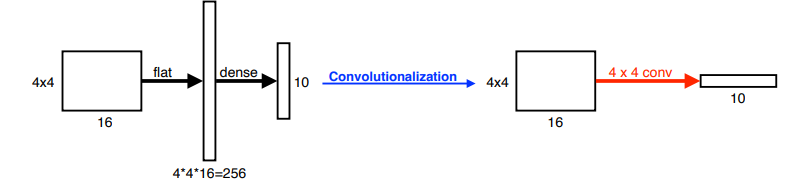
  - 왼쪽: 4*4*16*10=2560
  - 오른쪽: 4*4*16*10=2560
  - 이 과정을 convolutionalization라고 부름
- fully connected layer를 convolution layer로 변환하면 분류 넷이 heat map을 출력할 수 있다.
- fully connected layer는 모든 크기의 입력으로 실행할 수 있지만, 출력 dimension은 일반적으로  감소됨 -> 그래서 조잡한 output을 조밀한 픽셀에 연결하는 방법이 필요하다.


### Deconvolution (역컨볼루션)
- special demension을 키워줌
- 엄밀히 말하면 역컨볼루션은 존재할 수 없지만 계산할 때 편리함

## Detection

### R-CNN
1. 이미지 안에서 2000개의 region을 뽑아냄
2. 모든 region을 똑같은 크기로 맞춤
3. linear SVMs로 분류
- 정확도가 높지는않음
- convolution network 2000번 돌려야되서 시간이 오래걸림

### SPPNet
- R-CNN과 다른점: CNN을 한번만 돌림
- 이미지 안에서 bounding box 뽑고 얻어지는 convolutional feature map 위에서 bounding box의 tensor만 가져옴
- R-CNN보다 빠름

### Fast R-CNN
1. 이미지안에서 2000개의 region 뽑아냄
2. convolutional feature map 생성
3. 각각의 region에 대해서 fixed length feature을 얻음 (ROI pooling)
4. class와 bounding-box regressor 출력

### Faster R-CNN
- Region proposal network + Fast R-CNN
-  Region proposal network: bounding box 뽑아내는 과정도 네트워크로 학습
  -9: 세 가지 다른 비율(1:1, 1:2, 2:1)을 가진 세 가지 다른 영역 크기(128, 256, 512)
  -4: bounding box의 파라미터 (x,y,h,w)
  -2: bounding box를 사용할지 말지
  - 9*(4+2)=54

### YOLO
- 객체 탐지가 엄청 빠름
- bounding box를 따로 뽑지 않고 여러 경계 상자와 클래스 확률을 동시에 예측
1. 이미지를 SxS grid로 나눔
2. 각각의 cell은 B개의 bounding box를 예측
  - (x,y,w,h)와 confidence(쓸모있는지)
3. 동시에 각각의 cell이 어떤 클래스인지 예측
4. tensor size=SxSx(B*5+C)